In [1]:
import tensorflow

In [2]:
import pandas as pd
import numpy as np
import collections
import re

In [20]:
f=open(r"C:\Users\Admin\Desktop\text.txt")
document=f.read()
f.close()

In [21]:
document

'If you want to associate environment variables with an environment, you can use the config API. '

In [25]:
l_document = re.sub(r"[^a-zA-Z0-9]", " ", document.lower()).split()

In [26]:
l_document

['if',
 'you',
 'want',
 'to',
 'associate',
 'environment',
 'variables',
 'with',
 'an',
 'environment',
 'you',
 'can',
 'use',
 'the',
 'config',
 'api']

In [27]:
wordset=set(l_document)

In [28]:
wordset

{'an',
 'api',
 'associate',
 'can',
 'config',
 'environment',
 'if',
 'the',
 'to',
 'use',
 'variables',
 'want',
 'with',
 'you'}

In [29]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [30]:
bow1 = calculateBOW(wordset,l_document)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,if,with,can,config,to,an,use,want,variables,you,api,the,environment,associate
0,1,1,1,1,1,1,1,1,1,2,1,1,2,1


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [33]:
X = vectorizer.fit_transform([document])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,an,api,associate,can,config,environment,if,the,to,use,variables,want,with,you
0,1,1,1,1,1,2,1,1,1,1,1,1,1,2


In [34]:
print(vectorizer.get_feature_names_out())

['an' 'api' 'associate' 'can' 'config' 'environment' 'if' 'the' 'to' 'use'
 'variables' 'want' 'with' 'you']


In [37]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open(r"C:\Users\Admin\Desktop\text.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
print(dataset)

['if you want to associate environment variables with an environment you can use the config api ']


In [39]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [40]:
word2count

{'if': 1,
 'you': 2,
 'want': 1,
 'to': 1,
 'associate': 1,
 'environment': 2,
 'variables': 1,
 'with': 1,
 'an': 1,
 'can': 1,
 'use': 1,
 'the': 1,
 'config': 1,
 'api': 1}

In [41]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [42]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [43]:
word_to_ix

{'if': 0,
 'with': 1,
 'can': 2,
 'config': 3,
 'to': 4,
 'an': 5,
 'use': 6,
 'want': 7,
 'variables': 8,
 'you': 9,
 'api': 10,
 'the': 11,
 'environment': 12,
 'associate': 13}

In [44]:
ix_to_word

{0: 'if',
 1: 'with',
 2: 'can',
 3: 'config',
 4: 'to',
 5: 'an',
 6: 'use',
 7: 'want',
 8: 'variables',
 9: 'you',
 10: 'api',
 11: 'the',
 12: 'environment',
 13: 'associate'}

In [45]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['if', 'you', 'to', 'associate'], 'want'), (['you', 'want', 'associate', 'environment'], 'to'), (['want', 'to', 'environment', 'variables'], 'associate'), (['to', 'associate', 'variables', 'with'], 'environment'), (['associate', 'environment', 'with', 'an'], 'variables')]


In [46]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [47]:
embeddings

array([[0.08267304, 0.06872026, 0.52314585, 0.85719784, 0.23772   ,
        0.21990182, 0.59516288, 0.71610117, 0.0135521 , 0.32786658],
       [0.87422636, 0.9516628 , 0.58702059, 0.58114781, 0.06213979,
        0.66809174, 0.40835397, 0.77462323, 0.08932546, 0.99915129],
       [0.92544957, 0.01498296, 0.66945095, 0.6775853 , 0.32878235,
        0.83584151, 0.71668359, 0.82645497, 0.24184188, 0.28974657],
       [0.93778769, 0.7786902 , 0.64712119, 0.53514385, 0.1035955 ,
        0.08273537, 0.31713938, 0.34834821, 0.34856258, 0.04982951],
       [0.99234292, 0.93822048, 0.28073592, 0.22362329, 0.96376676,
        0.09481795, 0.7022882 , 0.34656426, 0.56779161, 0.50963159],
       [0.83133302, 0.63362814, 0.05718258, 0.42295399, 0.31136499,
        0.75578362, 0.69763447, 0.74176033, 0.45508205, 0.40099483],
       [0.91259908, 0.8091109 , 0.71821172, 0.48200706, 0.71107511,
        0.83958432, 0.18230773, 0.85929422, 0.88451157, 0.38777645],
       [0.60251991, 0.58005213, 0.5192427

In [48]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [49]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [50]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [51]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [52]:
 def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [53]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [54]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [55]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [56]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

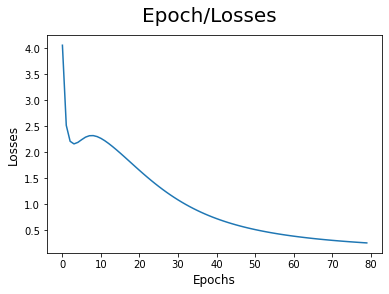

In [57]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [59]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['associate', 'environment', 'with', 'environment'])

'variables'

In [60]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0